In [1]:
# load, explore and plot data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,r2_score,accuracy_score
import re #for reducing noise of dataset;text reprocessing
import string #for text processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading the given dataset

data= pd.read_csv('FraudTest.csv' )

In [3]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [8]:
data.shape

(555719, 23)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
round(data.describe() , 2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939000e+01,1.567500e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854000e+01,5.060000e+00,2.003000e+01,3.467000e+01,3.937000e+01,4.189000e+01,6.569000e+01
long,555719.0,-9.023000e+01,1.372000e+01,-1.656700e+02,-9.680000e+01,-8.748000e+01,-8.018000e+01,-6.795000e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854000e+01,5.100000e+00,1.903000e+01,3.476000e+01,3.938000e+01,4.195000e+01,6.668000e+01
merch_long,555719.0,-9.023000e+01,1.373000e+01,-1.666700e+02,-9.691000e+01,-8.745000e+01,-8.026000e+01,-6.695000e+01


In [12]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

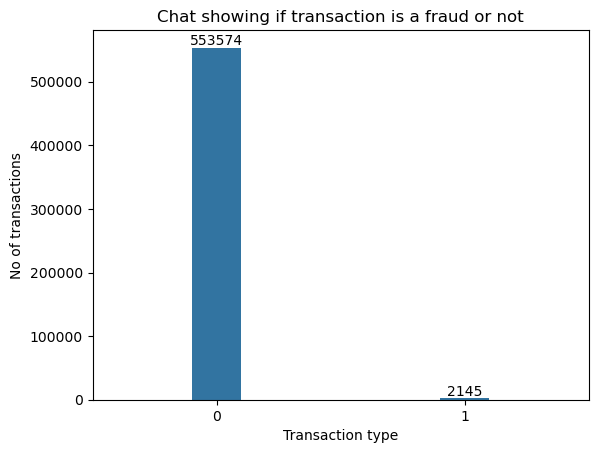

In [15]:
qq= sb.countplot(data = data, x="is_fraud", width=0.2)
qq.set_title("Chat showing if transaction is a fraud or not")
plt.xlabel("Transaction type")
plt.ylabel("No of transactions")

for i in qq.containers:
    qq.bar_label(i)

plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables from trainig data
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'gender', 'job','city', 'state', 'street']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [17]:
categorical_columns_to_drop = ['Unnamed: 0', 'dob', 'first', 'last', 'trans_num']

In [18]:
data.drop(columns=categorical_columns_to_drop, inplace=True)

In [19]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] =data['trans_date_trans_time'].dt.month
data['hour'] = data['trans_date_trans_time'].dt.hour
data['minute'] = data['trans_date_trans_time'].dt.minute
data['second'] = data['trans_date_trans_time'].dt.second

In [20]:
data = data.drop('trans_date_trans_time', axis=1)

In [21]:
data

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,unix_time,merch_lat,merch_long,is_fraud,year,month,hour,minute,second
0,2291163933867244,319,10,2.86,1,341,157,39,29209,33.9659,...,275,1371816865,33.986391,-81.200714,0,2020,6,12,14,25
1,3573030041201292,591,10,29.84,0,354,16,43,84002,40.3207,...,392,1371816873,39.450498,-109.960431,0,2020,6,12,14,33
2,3598215285024754,611,5,41.28,0,865,61,33,11710,40.6729,...,259,1371816893,40.495810,-74.196111,0,2020,6,12,14,53
3,3591919803438423,222,9,60.05,1,320,764,8,32780,28.5697,...,407,1371816915,28.812398,-80.883061,0,2020,6,12,15,15
4,3526826139003047,292,13,3.19,1,548,247,21,49632,44.2529,...,196,1371816917,44.959148,-85.884734,0,2020,6,12,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,1,531,443,23,63453,40.4931,...,460,1388534347,39.946837,-91.333331,0,2020,12,23,59,7
555715,3556613125071656,264,7,111.84,1,540,401,42,77566,29.0393,...,198,1388534349,29.661049,-96.186633,0,2020,12,23,59,9
555716,6011724471098086,496,7,86.88,0,126,104,46,99323,46.1966,...,294,1388534355,46.658340,-119.715054,0,2020,12,23,59,15
555717,4079773899158,75,13,7.99,1,663,476,12,83643,44.6255,...,58,1388534364,44.470525,-117.080888,0,2020,12,23,59,24


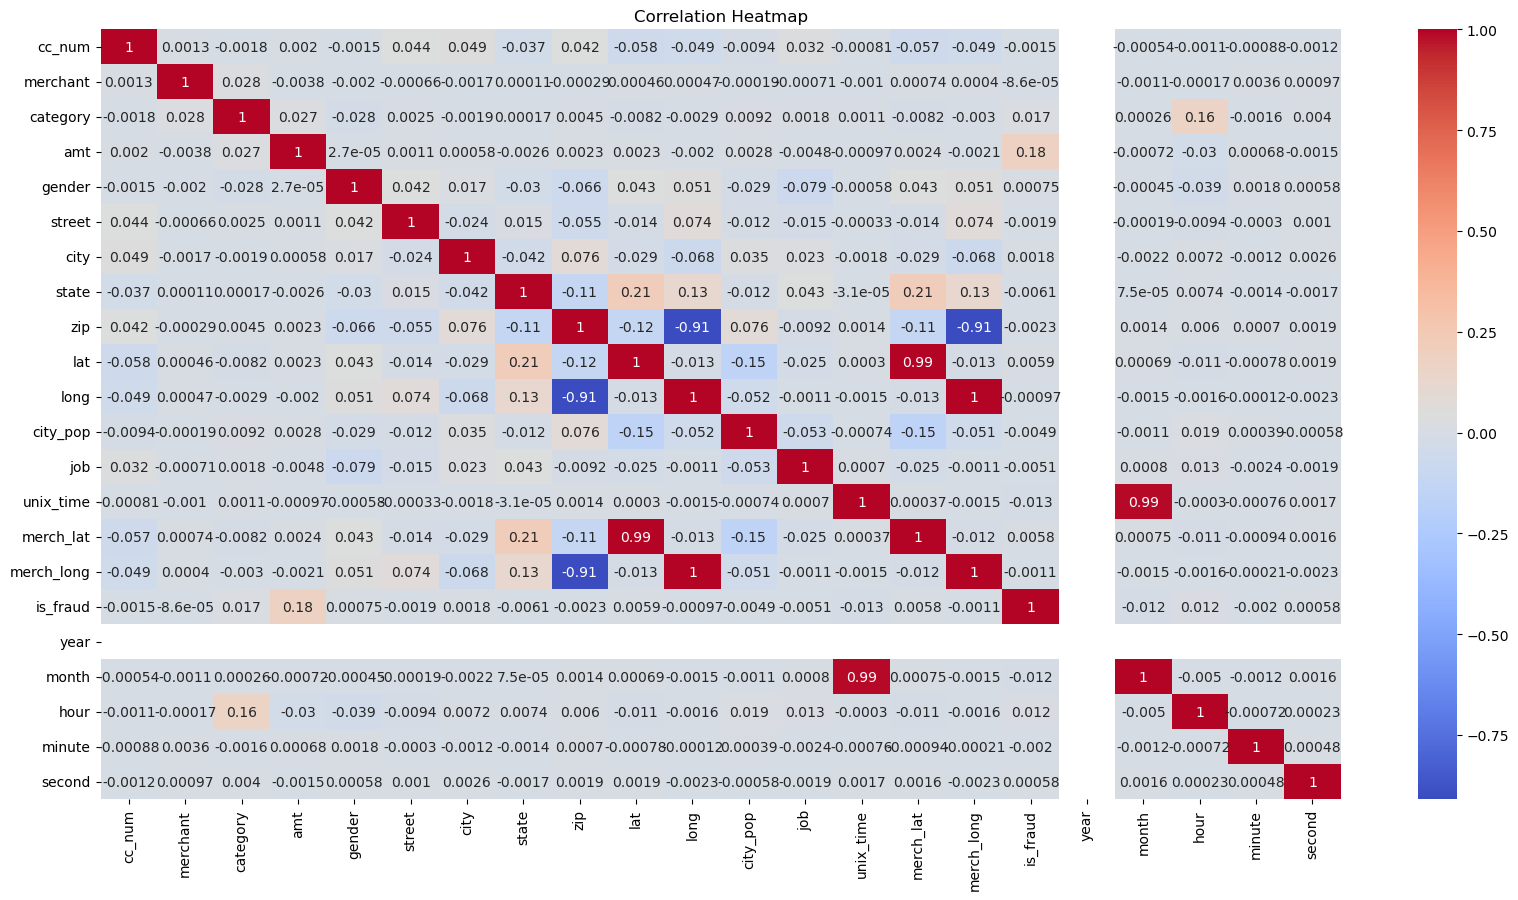

In [28]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
def split_fraud(data):
    not_fraud = data[data['is_fraud'] ==0]
    fraud = data[data['is_fraud'] ==1]
    return not_fraud, fraud

not_fraud_df, fraud_df = split_fraud(data)

In [30]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 1685 to 517571
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      2145 non-null   int64  
 1   merchant    2145 non-null   int32  
 2   category    2145 non-null   int32  
 3   amt         2145 non-null   float64
 4   gender      2145 non-null   int32  
 5   street      2145 non-null   int32  
 6   city        2145 non-null   int32  
 7   state       2145 non-null   int32  
 8   zip         2145 non-null   int64  
 9   lat         2145 non-null   float64
 10  long        2145 non-null   float64
 11  city_pop    2145 non-null   int64  
 12  job         2145 non-null   int32  
 13  unix_time   2145 non-null   int64  
 14  merch_lat   2145 non-null   float64
 15  merch_long  2145 non-null   float64
 16  is_fraud    2145 non-null   int64  
 17  year        2145 non-null   int32  
 18  month       2145 non-null   int32  
 19  hour        2145 non-null  

In [31]:
not_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553574 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      553574 non-null  int64  
 1   merchant    553574 non-null  int32  
 2   category    553574 non-null  int32  
 3   amt         553574 non-null  float64
 4   gender      553574 non-null  int32  
 5   street      553574 non-null  int32  
 6   city        553574 non-null  int32  
 7   state       553574 non-null  int32  
 8   zip         553574 non-null  int64  
 9   lat         553574 non-null  float64
 10  long        553574 non-null  float64
 11  city_pop    553574 non-null  int64  
 12  job         553574 non-null  int32  
 13  unix_time   553574 non-null  int64  
 14  merch_lat   553574 non-null  float64
 15  merch_long  553574 non-null  float64
 16  is_fraud    553574 non-null  int64  
 17  year        553574 non-null  int32  
 18  month       553574 non-null  int32  
 19  hour   

In [32]:
x_train,x_test,y_train,y_test= train_test_split(data.drop(columns=['is_fraud']),data['is_fraud'],test_size=0.1,random_state=32)

In [33]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr_prediction =  lr_model.predict(x_test)

Text(120.72222222222221, 0.5, 'Truth')

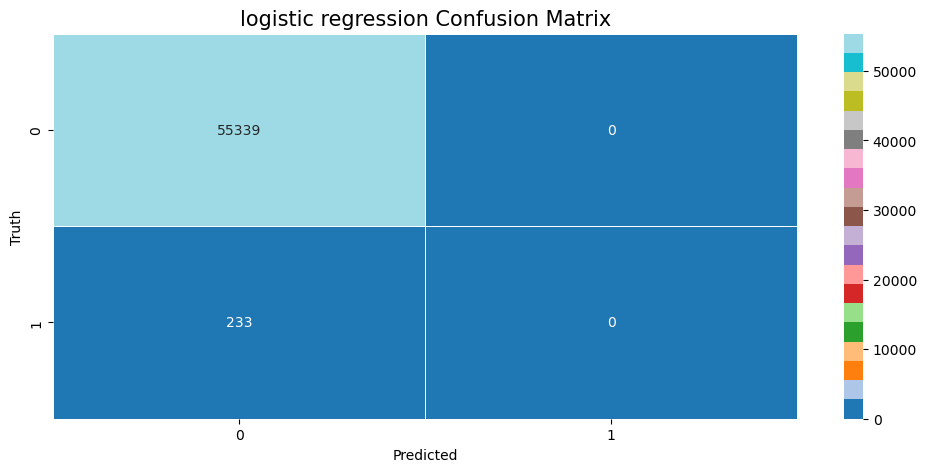

In [35]:
from sklearn.metrics import classification_report, f1_score,r2_score,accuracy_score,confusion_matrix

import seaborn as sn
cm = confusion_matrix(y_test, lr_prediction)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('logistic regression Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print("Logistic regression model")

print(classification_report(y_test,lr_prediction))
print("Accuracy:" , accuracy_score(y_test, lr_prediction))
print("r2_score:" , r2_score(y_test, lr_prediction))
print("f1_score:" , f1_score(y_test, lr_prediction))

Logistic regression model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55339
           1       0.00      0.00      0.00       233

    accuracy                           1.00     55572
   macro avg       0.50      0.50      0.50     55572
weighted avg       0.99      1.00      0.99     55572

Accuracy: 0.9958072410566472
r2_score: -0.004210412186703705
f1_score: 0.0


In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

Text(120.72222222222221, 0.5, 'Truth')

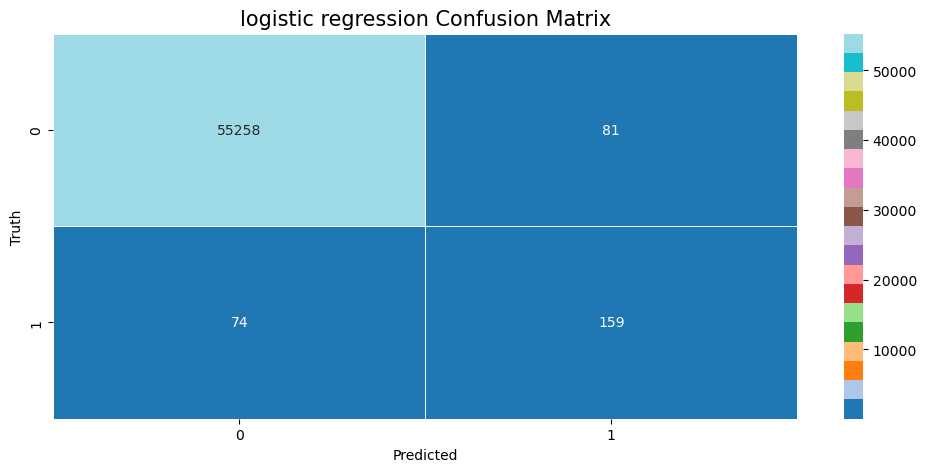

In [38]:
dtc_prediction =  dtc_model.predict(x_test)

cm = confusion_matrix(y_test, dtc_prediction)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('logistic regression Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
print("DecisionTreeClassifier model")

print(classification_report(y_test,dtc_prediction))
print("Accuracy:" , accuracy_score(y_test, dtc_prediction))
print("r2_score:" , r2_score(y_test, dtc_prediction))
print("f1_score:" , f1_score(y_test, dtc_prediction))

DecisionTreeClassifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55339
           1       0.66      0.68      0.67       233

    accuracy                           1.00     55572
   macro avg       0.83      0.84      0.84     55572
weighted avg       1.00      1.00      1.00     55572

Accuracy: 0.9972108255956237
r2_score: 0.33196303051957476
f1_score: 0.6723044397463002


In [40]:
from  sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

Text(120.72222222222221, 0.5, 'Truth')

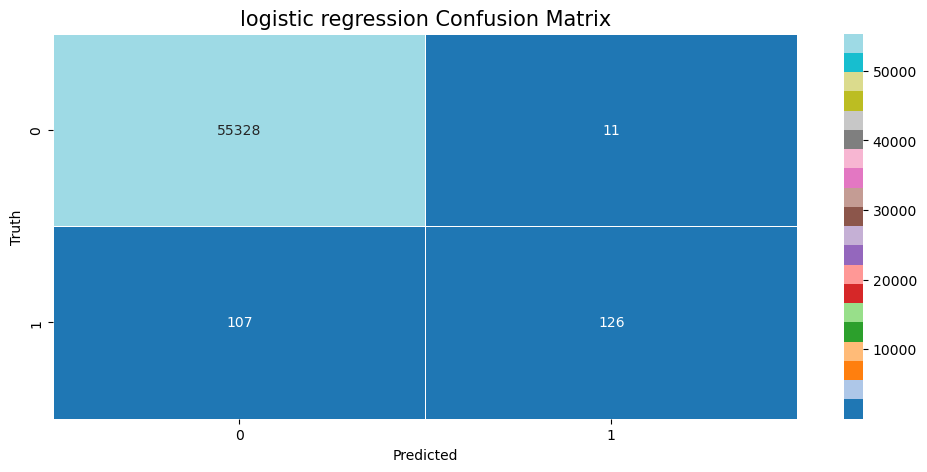

In [41]:
rf_prediction =  rf_model.predict(x_test)

cm = confusion_matrix(y_test, rf_prediction)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('logistic regression Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
print("DecisionTreeClassifier model")

print(classification_report(y_test,rf_prediction))
print("Accuracy:" , accuracy_score(y_test, rf_prediction))
print("r2_score:" , r2_score(y_test, rf_prediction))
print("f1_score:" , f1_score(y_test, rf_prediction))

DecisionTreeClassifier model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55339
           1       0.92      0.54      0.68       233

    accuracy                           1.00     55572
   macro avg       0.96      0.77      0.84     55572
weighted avg       1.00      1.00      1.00     55572

Accuracy: 0.9978766285179587
r2_score: 0.49142992000845054
f1_score: 0.6810810810810811


In [44]:
results_df = pd.DataFrame({
    'Original': y_test, 
    'Decision_Tree_Predicted': dtc_prediction,
    'Logistic_Regression_Predicted': lr_prediction,
    'Random_Forest_Predicted': rf_prediction
})


# Saving the DataFrame to a CSV file
results_df.to_csv('predicted_fraudresults.csv', index=True)